In [1]:
!pip install wordcloud

In [27]:
#4.Approach for Data cleansing 
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing Libraries
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime
import glob
import os
import json
import pickle
import six
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [4]:
#Importing all the CSV files
allcsv=[i for i in glob.glob('*.{}'.format('csv'))]
allcsv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [5]:
#Reading all CSV files

all_dfs = [] # list to store each data frame separately
for csv in allcsv:
    df = pd.read_csv(csv)
    df['country'] = csv[0:2] # adding column 'country' so that each dataset could be identified uniquely
    all_dfs.append(df)
all_dfs[0].head() # index 0 to 9 for [CA, DE, FR, GB, IN, JP, KR, MX, RU, US] datasets

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA


In [14]:
#Number of rows and columns dataset contains
df.shape

(40949, 17)

In [10]:
#summary of columns and their associated data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [11]:
#Statistical summary of our numerical columns
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [13]:
#Statistical summary of our categorical columns
#Publish Time column with data type : Object
df.describe(include=['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,country
count,40949,40949,40949,40949,40949,40949,40949,40379,40949
unique,6351,205,6455,2207,6269,6055,6352,6901,1
top,j4KvrAUjn6c,18.30.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...,US
freq,30,200,30,203,50,1535,30,58,40949


In [15]:
for df in all_dfs:
    # video_id 
    df['video_id'] = df['video_id'].astype('str') 
    # trending date
    df['trending_date'] = ['20'] + df['trending_date']
    df['trending_date'] = pd.to_datetime(df['trending_date'], format = "%Y.%d.%m")
    #title
    df['title'] = df['title'].astype('str')
    #channel_title
    df['channel_title'] = df['channel_title'].astype('str')
    #category_id
    df['category_id'] = df['category_id'].astype(str) 
    #tags
    df['tags'] = df['tags'].astype('str')
    
    # views, likes, dislikes, comment_count are already in correct data types i.e int64
    
    #thumbnail_link
    df['thumbnail_link'] = df['thumbnail_link'].astype('str') 
    #description
    df['description'] = df['description'].astype('str')
    # Changing comments_disabled, ratings_disabled, video_error_or_removed from bool to categorical
    df['comments_disabled'] = df['comments_disabled'].astype('category') 
    df['ratings_disabled'] = df['ratings_disabled'].astype('category') 
    df['video_error_or_removed'] = df['video_error_or_removed'].astype('category') 
    
    # publish_time 
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

In [16]:
df['publish_time'].head()

0   2017-11-13 17:13:01
1   2017-11-13 07:30:00
2   2017-11-12 19:05:24
3   2017-11-13 11:00:04
4   2017-11-12 18:01:41
Name: publish_time, dtype: datetime64[ns]

In [17]:
df['trending_date'].head()

0   2017-11-14
1   2017-11-14
2   2017-11-14
3   2017-11-14
4   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [35]:
# Changing data type for 'publish_date' from object to 'datetime64[ns]'
for df in all_dfs:
     df['publish_date'] = df['publish_date'].astype('datetime64[ns]')
     #df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce', format = "%Y-%m-%d")

In [36]:
all_dfs[1].dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
publish_date              datetime64[ns]
category_id                       object
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled               category
ratings_disabled                category
video_error_or_removed          category
description                       object
country                           object
dtype: object

In [37]:
df.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13,24,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US


In [49]:
#For the index, we chose video_id
for df in all_dfs:
    df.set_index('video_id', inplace=True)

KeyError: "None of ['video_id'] are in the columns"

In [42]:
df.head()

,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,,
n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,2017-11-10,10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13,23,17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09,10,11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA


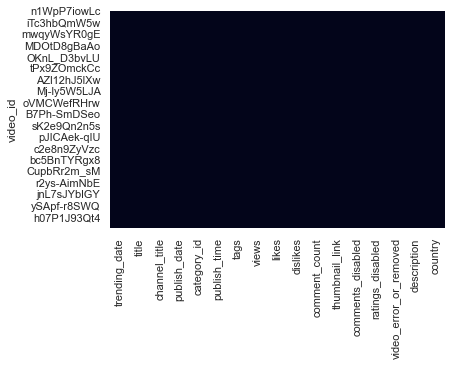

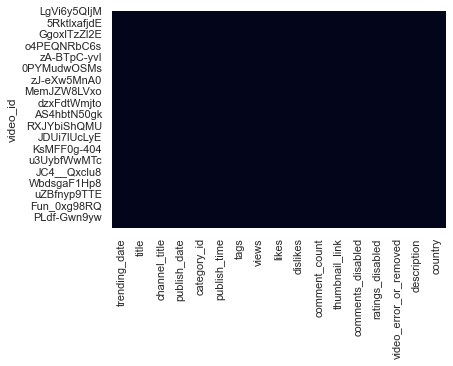

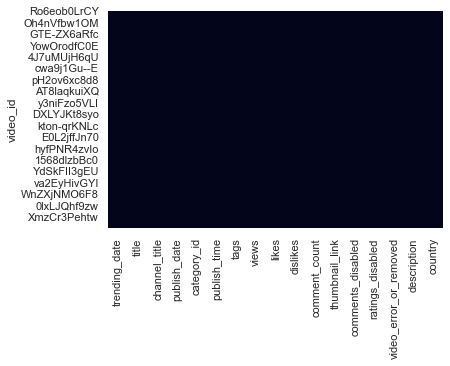

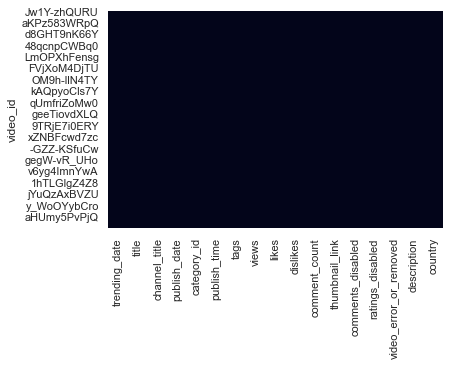

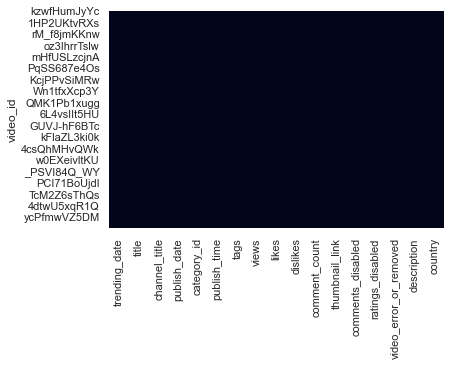

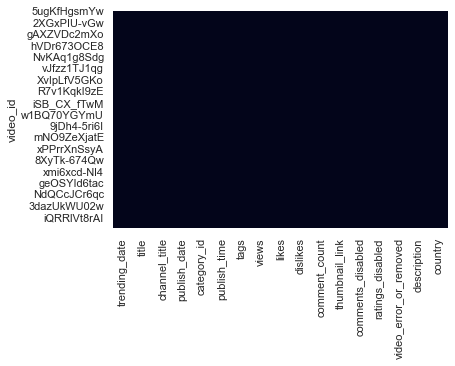

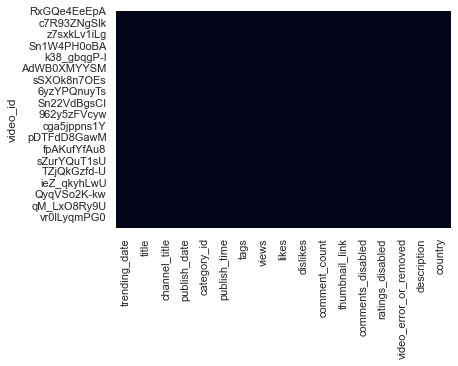

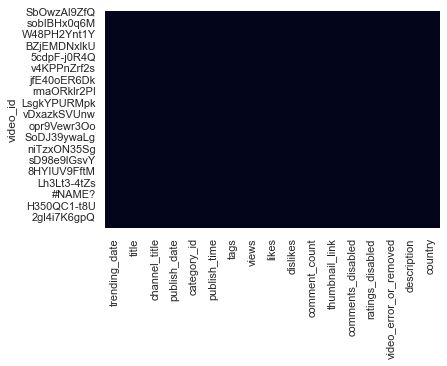

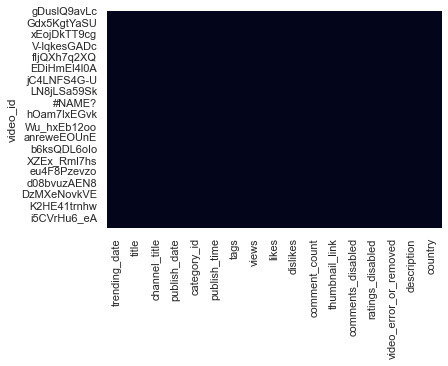

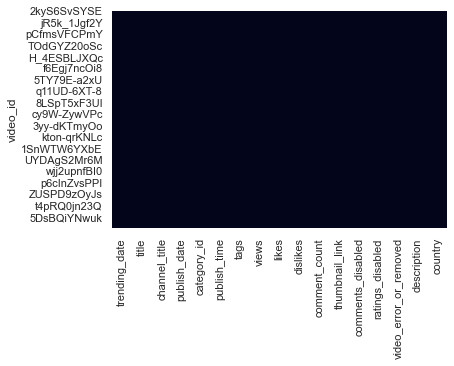

<Figure size 432x288 with 0 Axes>

In [45]:
#Examining Missing Values
for df in all_dfs:
    sns.heatmap(df.isnull(), cbar=False)
    plt.figure()

In [64]:
#Combining Every Dataframe Into One Huge Dataframe
combined_df = pd.concat(all_dfs)

In [66]:
# Making copy of original dataframe
backup_df = combined_df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')
# Sorting according to latest trending date while removing duplicates
combined_df = combined_df.reset_index().sort_values('trending_date', ascending=False).drop_duplicates('video_id',keep='first').set_index('video_id')
# Doing the same above operation for each of the individual dataframes in the list we created earlier
for df in all_dfs:
    df = df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')
# Printing results
combined_df[['publish_date','publish_time','trending_date', 'country']].head()
# It can be seen that latest publications and trending information is at the top now

,publish_date,publish_time,trending_date,country
video_id,,,,
ooyjaVdt-jA,2018-05-17,17:09:38,2018-06-14,US
ZuMssIxmPT0,2018-06-13,14:00:04,2018-06-14,FR
r3NCO_Jj8vk,2018-06-13,16:13:02,2018-06-14,RU
nombgovJQYc,2018-06-13,04:00:03,2018-06-14,RU
Vm4phwVPPhI,2018-06-13,16:30:00,2018-06-14,RU


In [46]:
#Inserting Category Column 
#One of our final steps for the data cleaning of the data sets was checking the JSON files that were available with the data sets
#Read file
with open('US_category_id.json', 'r') as f:  # reading one randomly selected json files to make sense of its contents
    data = f.read()
# parse file
obj = json.loads(data)
# printing
obj

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [86]:
combined_df=combined_df.drop(['category'],axis=1)

In [93]:
category_id = {}
with open('DE_category_id.json', 'r') as f:
    d = json.load(f)
    for category in d['items']:
        category_id[category['id']] = category['snippet']['title']
combined_df.insert(2, 'category', combined_df['category_id'].map(category_id))
backup_df.insert(2, 'category', backup_df['category_id'].map(category_id))
for df in all_dfs:
    df.insert(2, 'category', df['category_id'].map(category_id))
# Printing cleaned combined dataframe
combined_df.head(3)

ValueError: cannot insert category, already exists

In [94]:
combined_df.head()

,trending_date,title,category,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,,,
ooyjaVdt-jA,2018-06-14,Official Call of Duty®: Black Ops 4 — Multipla...,Trailers,Call of Duty,2018-05-17,20,17:09:38,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,US
ZuMssIxmPT0,2018-06-14,Vald - Deviens génial,Trailers,VALDVEVO,2018-06-13,10,14:00:04,"vald|""vald deviens génial""|""vald deviens genia...",588392,58881,2071,4160,https://i.ytimg.com/vi/ZuMssIxmPT0/default.jpg,False,False,False,Vald – Deviens génialExtrait de XEU disponible...,FR
r3NCO_Jj8vk,2018-06-14,НАСКОЛЬКО СИЛЬНЫМ БЫЛ РОННИ КОУЛМЕН?,Trailers,GoB Channel,2018-06-13,17,16:13:02,"насколько|""сильным""|""ронни коулмен""|""ронни кол...",72026,6216,61,874,https://i.ytimg.com/vi/r3NCO_Jj8vk/default.jpg,False,False,False,Обучение в колледже Вейдера http://www.cbb.ru/...,RU
nombgovJQYc,2018-06-14,"Frea King Teens: MORGENSHTERN, BOULEVARD DEPO,...",Trailers,FREA KING,2018-06-13,10,04:00:03,"американцы слушают русскую музыку|""americans l...",29801,2316,267,332,https://i.ytimg.com/vi/nombgovJQYc/default.jpg,False,False,False,ИНОСТРАНЦЫ СЛУШАЮТ РУССКУЮ МУЗЫКУ | АМЕРИКАНЦЫ...,RU
Vm4phwVPPhI,2018-06-14,Как будет играть Сборная Испании на ЧМ 2018? |...,Trailers,МЯЧ Production,2018-06-13,17,16:30:00,"чм|""чм2018""|""сборная испании""|""чемпионат мира""...",57710,4291,51,292,https://i.ytimg.com/vi/Vm4phwVPPhI/default.jpg,False,False,False,Сборная Испании будет играть в футбол Лопетеги...,RU


In [95]:
combined_df['category'].unique()

array(['Trailers', nan], dtype=object)

In [60]:
#5.Figure out if there is a correlation between the number of views and the number of likes.
columns_of_interest = ['views', 'likes']
corr_matrix = df[columns_of_interest].corr()
corr_matrix

,views,likes
views,1.000000,0.828964
likes,0.828964,1.000000


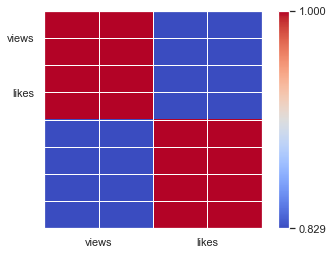

In [61]:
fig, ax = plt.subplots()
heatmap = ax.imshow(corr_matrix, interpolation='nearest', cmap=cm.coolwarm)
# making the colorbar on the side
cbar_min = corr_matrix.min().min()
cbar_max = corr_matrix.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])
# making the labels
labels = ['']
for column in columns_of_interest:
    labels.append(column)
    labels.append('')
ax.set_yticklabels(labels, minor=False)
ax.set_xticklabels(labels, minor=False)
plt.show()

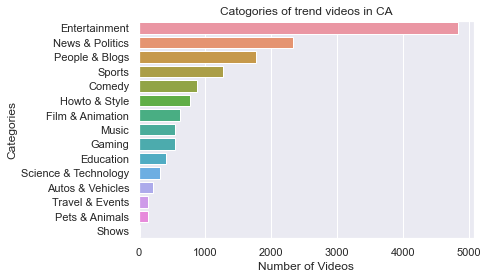

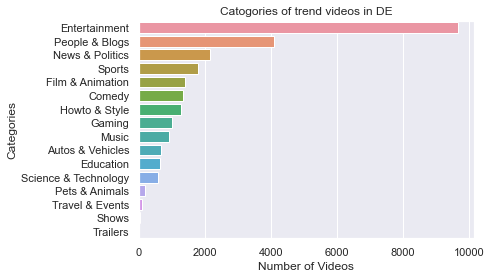

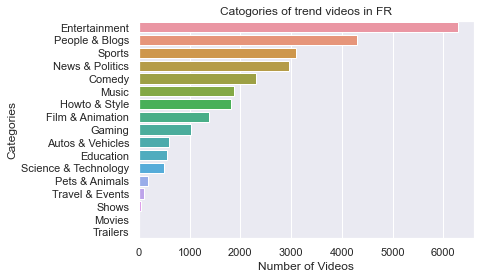

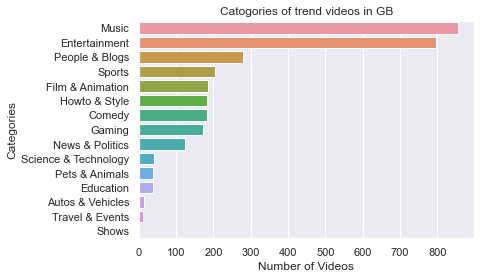

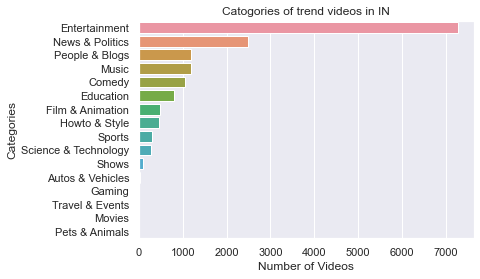

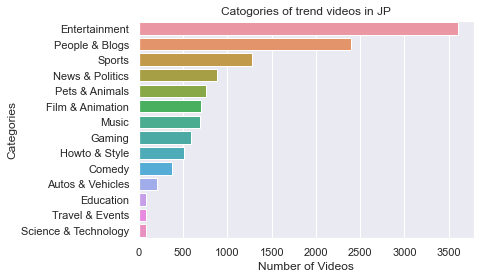

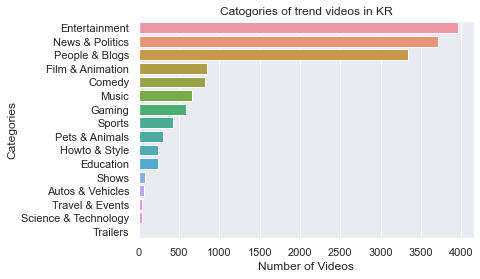

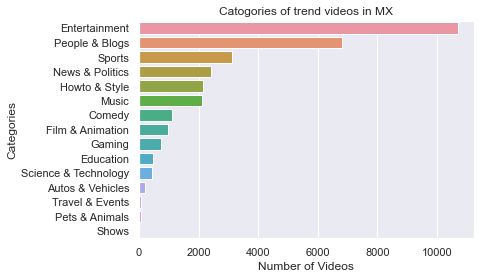

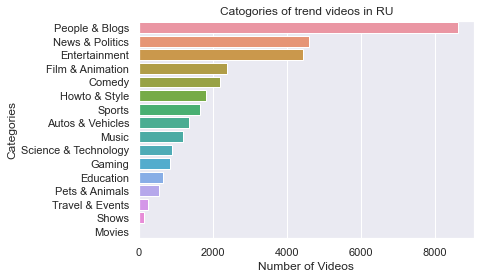

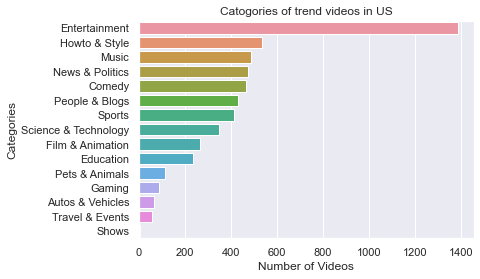

In [79]:
#6.List top trending videos in each category 
# Getting names of all countries
countries = []
allcsv = [i for i in glob.glob('*.{}'.format('csv'))]
for csv in allcsv:
    c = csv[0:2]
    countries.append(c)
for country in countries:
    if country == 'US':
        tempdf = combined_df[combined_df['country']==country]['category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
    else:
        tempdf = combined_df[combined_df['country']==country]['category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
        plt.figure()

In [98]:
#7.Create a new feature called total_trend_days that just calculates the number of days a video has trended in a new column.
# Calculating days between publish and trending date
temporary = []
for total_trend_days in all_dfs:
    temp = total_trend_days
    temp['total_trend_days'] = (temp['trending_date'] - temp['publish_date']).dt.days
    temporary.append(temp)
total_trend_days.sort_values(by='total_trend_days',ascending=False).head()

,trending_date,title,category1,category,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,total_trend_days
video_id,,,,,,,,,,,,,,,,,,,,
MJO3FmmFuh4,2018-02-05,Budweiser - Original Whazzup? ad,Entertainment,Entertainment,dannotv,2006-07-23,24,08:24:11,"Budweiser|""Bud""|""Whazzup""|""ad""",258506,459,152,82,https://i.ytimg.com/vi/MJO3FmmFuh4/default.jpg,False,False,False,"Original Whazzup ad - however, there is a litt...",US,4215
UQtt9I6c-YM,2018-01-09,Kramer vs Kramer-Clou Scene,Film & Animation,Film & Animation,Livia Giustiniani,2008-04-05,1,18:22:40,"Meryl|""Streep""|""kramer""|""vs""|""dustin""|""hoffman...",50168,46,6,26,https://i.ytimg.com/vi/UQtt9I6c-YM/default.jpg,False,False,False,Poor Meryl...she was really scaredxD,US,3566
UQtt9I6c-YM,2018-01-08,Kramer vs Kramer-Clou Scene,Film & Animation,Film & Animation,Livia Giustiniani,2008-04-05,1,18:22:40,"Meryl|""Streep""|""kramer""|""vs""|""dustin""|""hoffman...",50117,46,6,26,https://i.ytimg.com/vi/UQtt9I6c-YM/default.jpg,False,False,False,Poor Meryl...she was really scaredxD,US,3565
UQtt9I6c-YM,2018-01-07,Kramer vs Kramer-Clou Scene,Film & Animation,Film & Animation,Livia Giustiniani,2008-04-05,1,18:22:40,"Meryl|""Streep""|""kramer""|""vs""|""dustin""|""hoffman...",50030,46,6,26,https://i.ytimg.com/vi/UQtt9I6c-YM/default.jpg,False,False,False,Poor Meryl...she was really scaredxD,US,3564
UQtt9I6c-YM,2018-01-06,Kramer vs Kramer-Clou Scene,Film & Animation,Film & Animation,Livia Giustiniani,2008-04-05,1,18:22:40,"Meryl|""Streep""|""kramer""|""vs""|""dustin""|""hoffman...",49942,46,6,26,https://i.ytimg.com/vi/UQtt9I6c-YM/default.jpg,False,False,False,Poor Meryl...she was really scaredxD,US,3563


In [111]:
#8.Figure out the relationship between the published_time and trending_date
columns_of_interest = ['views','likes','publish_time', 'trending_date']
corr_matrix = df[columns_of_interest].corr("pearson")
corr_matrix

,views,likes
views,1.000000,0.849177
likes,0.849177,1.000000


In [114]:
temp = combined_df
temp = temp.groupby('category')['views', 'likes'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='likes', ascending=False).head()
temp

,views,likes
category,,
Trailers,61355752653,1698579336


In [53]:
df['trending_date']= pd.to_datetime('13000101', format='%Y%m%d', errors='coerce')
df['trending_date'].head(10)

video_id
n1WpP7iowLc   NaT
0dBIkQ4Mz1M   NaT
5qpjK5DgCt4   NaT
d380meD0W0M   NaT
2Vv-BfVoq4g   NaT
0yIWz1XEeyc   NaT
_uM5kFfkhB8   NaT
2kyS6SvSYSE   NaT
JzCsM1vtn78   NaT
43sm-QwLcx4   NaT
Name: trending_date, dtype: datetime64[ns]